In [47]:
! pip install tensorflow-gpu

In [48]:
! pip install keras

In [49]:
! pip install pandas

In [50]:
import matplotlib.pylab as plt
import numpy as np
import tensorflow_hub as hub
import tensorflow as tf
print("TF version:", tf.__version__)
print("Hub version:", hub.__version__)
print("GPU is", "available" if tf.test.is_gpu_available() else "NOT AVAILABLE")

TF version: 2.3.1
Hub version: 0.9.0
GPU is available


In [51]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten,Conv2D,MaxPooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
from glob import glob


In [52]:
from sklearn.utils import shuffle
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score
import os
import cv2

In [61]:
import pandas as pd
from sklearn.datasets import load_digits
digits=load_digits()

In [62]:
dir(digits)

['DESCR', 'data', 'images', 'target', 'target_names']

In [59]:
df=pd.DataFrame(digits['data'])
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,13.0,15.0,10.0,15.0,5.0,0.0,0.0,3.0,15.0,2.0,0.0,11.0,8.0,0.0,0.0,4.0,12.0,0.0,0.0,8.0,8.0,0.0,0.0,5.0,8.0,0.0,0.0,9.0,8.0,0.0,0.0,4.0,11.0,0.0,1.0,12.0,7.0,0.0,0.0,2.0,14.0,5.0,10.0,12.0,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,0.0,11.0,16.0,9.0,0.0,0.0,0.0,0.0,3.0,15.0,16.0,6.0,0.0,0.0,0.0,7.0,15.0,16.0,16.0,2.0,0.0,0.0,0.0,0.0,1.0,16.0,16.0,3.0,0.0,0.0,0.0,0.0,1.0,16.0,16.0,6.0,0.0,0.0,0.0,0.0,1.0,16.0,16.0,6.0,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,3.0,16.0,15.0,14.0,0.0,0.0,0.0,0.0,8.0,13.0,8.0,16.0,0.0,0.0,0.0,0.0,1.0,6.0,15.0,11.0,0.0,0.0,0.0,1.0,8.0,13.0,15.0,1.0,0.0,0.0,0.0,9.0,16.0,16.0,5.0,0.0,0.0,0.0,0.0,3.0,13.0,16.0,16.0,11.0,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,13.0,6.0,15.0,4.0,0.0,0.0,0.0,2.0,1.0,13.0,13.0,0.0,0.0,0.0,0.0,0.0,2.0,15.0,11.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,12.0,12.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,10.0,8.0,0.0,0.0,0.0,8.0,4.0,5.0,14.0,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,8.0,0.0,0.0,0.0,0.0,0.0,1.0,13.0,6.0,2.0,2.0,0.0,0.0,0.0,7.0,15.0,0.0,9.0,8.0,0.0,0.0,5.0,16.0,10.0,0.0,16.0,6.0,0.0,0.0,4.0,15.0,16.0,13.0,16.0,1.0,0.0,0.0,0.0,0.0,3.0,15.0,10.0,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,16.0,14.0,12.0,16.0,3.0,0.0,0.0,4.0,16.0,6.0,3.0,16.0,4.0,0.0,0.0,0.0,12.0,16.0,16.0,16.0,5.0,0.0,0.0,0.0,0.0,4.0,4.0,16.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,15.0,5.0,0.0,0.0,0.0,5.0,7.0,7.0,16.0,4.0,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,16.0,15.0,12.0,16.0,1.0,0.0,0.0,3.0,16.0,7.0,0.0,13.0,6.0,0.0,0.0,4.0,16.0,0.0,0.0,10.0,8.0,0.0,0.0,8.0,16.0,0.0,0.0,14.0,6.0,0.0,0.0,5.0,16.0,7.0,9.0,16.0,5.0,0.0,0.0,1.0,15.0,16.0,16.0,16.0,1.0,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,13.0,16.0,8.0,2.0,1.0,0.0,0.0,0.0,16.0,15.0,10.0,16.0,5.0,0.0,0.0,0.0,8.0,16.0,16.0,7.0,0.0,0.0,0.0,0.0,9.0,16.0,16.0,4.0,0.0,0.0,0.0,0.0,16.0,14.0,16.0,15.0,0.0,0.0,0.0,0.0,15.0,15.0,15.0,16.0,0.0,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,14.0,16.0,16.0,15.0,1.0,0.0,0.0,4.0,16.0,7.0,3.0,16.0,7.0,0.0,0.0,5.0,16.0,10.0,7.0,16.0,4.0,0.0,0.0,0.0,5.0,14.0,14.0,16.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,16.0,2.0,0.0,0.0,0.0,4.0,7.0,7.0,16.0,2.0,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0


In [63]:
df['Target']=digits.target

In [64]:
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,Target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,13.0,15.0,10.0,15.0,5.0,0.0,0.0,3.0,15.0,2.0,0.0,11.0,8.0,0.0,0.0,4.0,12.0,0.0,0.0,8.0,8.0,0.0,0.0,5.0,8.0,0.0,0.0,9.0,8.0,0.0,0.0,4.0,11.0,0.0,1.0,12.0,7.0,0.0,0.0,2.0,14.0,5.0,10.0,12.0,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,0.0,11.0,16.0,9.0,0.0,0.0,0.0,0.0,3.0,15.0,16.0,6.0,0.0,0.0,0.0,7.0,15.0,16.0,16.0,2.0,0.0,0.0,0.0,0.0,1.0,16.0,16.0,3.0,0.0,0.0,0.0,0.0,1.0,16.0,16.0,6.0,0.0,0.0,0.0,0.0,1.0,16.0,16.0,6.0,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,3.0,16.0,15.0,14.0,0.0,0.0,0.0,0.0,8.0,13.0,8.0,16.0,0.0,0.0,0.0,0.0,1.0,6.0,15.0,11.0,0.0,0.0,0.0,1.0,8.0,13.0,15.0,1.0,0.0,0.0,0.0,9.0,16.0,16.0,5.0,0.0,0.0,0.0,0.0,3.0,13.0,16.0,16.0,11.0,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,13.0,6.0,15.0,4.0,0.0,0.0,0.0,2.0,1.0,13.0,13.0,0.0,0.0,0.0,0.0,0.0,2.0,15.0,11.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,12.0,12.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,10.0,8.0,0.0,0.0,0.0,8.0,4.0,5.0,14.0,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,8.0,0.0,0.0,0.0,0.0,0.0,1.0,13.0,6.0,2.0,2.0,0.0,0.0,0.0,7.0,15.0,0.0,9.0,8.0,0.0,0.0,5.0,16.0,10.0,0.0,16.0,6.0,0.0,0.0,4.0,15.0,16.0,13.0,16.0,1.0,0.0,0.0,0.0,0.0,3.0,15.0,10.0,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,16.0,14.0,12.0,16.0,3.0,0.0,0.0,4.0,16.0,6.0,3.0,16.0,4.0,0.0,0.0,0.0,12.0,16.0,16.0,16.0,5.0,0.0,0.0,0.0,0.0,4.0,4.0,16.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,15.0,5.0,0.0,0.0,0.0,5.0,7.0,7.0,16.0,4.0,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0,9
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,16.0,15.0,12.0,16.0,1.0,0.0,0.0,3.0,16.0,7.0,0.0,13.0,6.0,0.0,0.0,4.0,16.0,0.0,0.0,10.0,8.0,0.0,0.0,8.0,16.0,0.0,0.0,14.0,6.0,0.0,0.0,5.0,16.0,7.0,9.0,16.0,5.0,0.0,0.0,1.0,15.0,16.0,16.0,16.0,1.0,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0,0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,13.0,16.0,8.0,2.0,1.0,0.0,0.0,0.0,16.0,15.0,10.0,16.0,5.0,0.0,0.0,0.0,8.0,16.0,16.0,7.0,0.0,0.0,0.0,0.0,9.0,16.0,16.0,4.0,0.0,0.0,0.0,0.0,16.0,14.0,16.0,15.0,0.0,0.0,0.0,0.0,15.0,15.0,15.0,16.0,0.0,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0,8
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,14.0,16.0,16.0,15.0,1.0,0.0,0.0,4.0,16.0,7.0,3.0,16.0,7.0,0.0,0.0,5.0,16.0,10.0,7.0,16.0,4.0,0.0,0.0,0.0,5.0,14.0,14.0,16.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,16.0,2.0,0.0,0.0,0.0,4.0,7.0,7.0,16.0,2.0,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0,9


In [65]:
df.shape

(1797, 65)

In [66]:
df.columns

Index([       0,        1,        2,        3,        4,        5,        6,
              7,        8,        9,       10,       11,       12,       13,
             14,       15,       16,       17,       18,       19,       20,
             21,       22,       23,       24,       25,       26,       27,
             28,       29,       30,       31,       32,       33,       34,
             35,       36,       37,       38,       39,       40,       41,
             42,       43,       44,       45,       46,       47,       48,
             49,       50,       51,       52,       53,       54,       55,
             56,       57,       58,       59,       60,       61,       62,
             63, 'Target'],
      dtype='object')

In [67]:
df.isnull().sum()

0         0
1         0
2         0
3         0
4         0
         ..
60        0
61        0
62        0
63        0
Target    0
Length: 65, dtype: int64

In [68]:
df.nunique()

0          1
1          9
2         17
3         17
4         17
          ..
60        17
61        17
62        17
63        17
Target    10
Length: 65, dtype: int64

In [69]:
df.dtypes

0         float64
1         float64
2         float64
3         float64
4         float64
           ...   
60        float64
61        float64
62        float64
63        float64
Target      int64
Length: 65, dtype: object

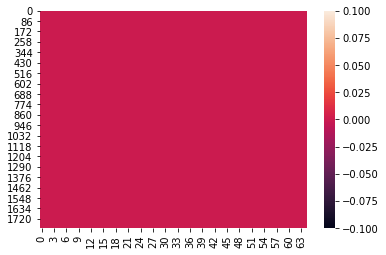

In [70]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.heatmap(df.isnull())

In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [73]:
X = df.drop(['Target'],axis='columns')
y = df['Target']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=10)

In [74]:
len(X_train.columns)

64

In [75]:
from sklearn.preprocessing import StandardScaler
s=StandardScaler()
X_train=s.fit_transform(X_train)
X_test=s.transform(X_test)

In [76]:
y_train.shape

(1257,)

In [77]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test) 

In [90]:
y_train.shape

(1257, 10)

In [78]:

X_train.shape

(1257, 64)

In [79]:
X_test.shape

(540, 64)

In [80]:
X_train

array([[ 0.        , -0.34028227, -0.45939049, ..., -0.30025736,
        -0.50598673, -0.19259892],
       [ 0.        , -0.34028227, -0.88258862, ..., -0.47103723,
        -0.50598673, -0.19259892],
       [ 0.        , -0.34028227,  0.1754067 , ..., -0.1294775 ,
        -0.50598673, -0.19259892],
       ...,
       [ 0.        , -0.34028227,  0.1754067 , ...,  1.57832116,
         3.39600908,  6.0416545 ],
       [ 0.        , -0.34028227,  2.07979828, ...,  1.06598156,
         0.9572617 , -0.19259892],
       [ 0.        , -0.34028227, -0.67098956, ...,  0.72442183,
         3.39600908,  2.92452779]])

In [81]:
y_train.shape

(1257, 10)

In [82]:
model = Sequential([
    Dense(100, input_shape=(64,), activation='relu'),
    Dense(10, activation='softmax')
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 100)               6500      
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1010      
Total params: 7,510
Trainable params: 7,510
Non-trainable params: 0
_________________________________________________________________


In [83]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

r=model.fit(X_train, y_train, epochs=500,validation_data=(X_test,y_test))

Epoch 1/500
40/40 [==============================] - 0s 5ms/step - loss: 1.6824 - accuracy: 0.5052 - val_loss: 1.0563 - val_accuracy: 0.8056
Epoch 2/500
40/40 [==============================] - 0s 3ms/step - loss: 0.7346 - accuracy: 0.8878 - val_loss: 0.5865 - val_accuracy: 0.9093
Epoch 3/500
40/40 [==============================] - 0s 3ms/step - loss: 0.4153 - accuracy: 0.9411 - val_loss: 0.4058 - val_accuracy: 0.9296
Epoch 4/500
40/40 [==============================] - 0s 3ms/step - loss: 0.2764 - accuracy: 0.9586 - val_loss: 0.3097 - val_accuracy: 0.9426
Epoch 5/500
40/40 [==============================] - 0s 3ms/step - loss: 0.2019 - accuracy: 0.9737 - val_loss: 0.2534 - val_accuracy: 0.9519
Epoch 6/500
40/40 [==============================] - 0s 3ms/step - loss: 0.1571 - accuracy: 0.9793 - val_loss: 0.2190 - val_accuracy: 0.9556
Epoch 7/500
40/40 [==============================] - 0s 3ms/step - loss: 0.1269 - accuracy: 0.9849 - val_loss: 0.1936 - val_accuracy: 0.9630
Epoch 8/500
4

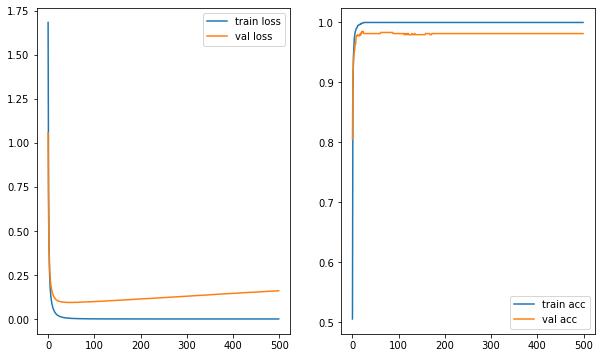

In [84]:
# plot the loss
plt.figure(figsize=(10,6))

plt.subplot(1,2,1)
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.subplot(1,2,2)
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.savefig('AccVal_acc')

In [85]:
k=r.history['val_accuracy']
print('The Validation Accuracy of ANN Model: ', np.mean(k))

The Validation Accuracy of ANN Model:  0.9805296404361725


In [86]:
yp= model.predict(X_test)
yp

array([[2.51224909e-12, 1.23093380e-19, 3.28881823e-16, ...,
        2.81317497e-14, 5.16017799e-17, 1.00180217e-15],
       [1.08383965e-21, 1.35541525e-22, 1.00000000e+00, ...,
        7.19716361e-21, 5.79161954e-16, 6.63193478e-20],
       [1.32080336e-15, 1.39768566e-19, 1.97513880e-20, ...,
        2.72988627e-17, 4.51440127e-19, 8.79603111e-16],
       ...,
       [3.03439866e-20, 4.20915212e-12, 5.27994638e-18, ...,
        1.00000000e+00, 1.03738425e-20, 1.25877646e-16],
       [2.31840168e-14, 6.29403907e-12, 8.75740536e-10, ...,
        1.80173476e-13, 1.00000000e+00, 6.09130191e-15],
       [2.20433879e-16, 4.06483726e-16, 2.36573274e-15, ...,
        4.18610730e-13, 2.70247869e-11, 9.62421028e-12]], dtype=float32)

In [87]:
y_pred_labels=np.argmax(yp,axis=1)
y_pred_labels

array([5, 2, 5, 4, 8, 2, 4, 3, 3, 0, 8, 7, 0, 1, 8, 6, 9, 7, 9, 7, 1, 8,
       6, 7, 8, 8, 5, 8, 5, 9, 3, 3, 7, 3, 4, 1, 9, 2, 5, 4, 2, 1, 0, 9,
       2, 3, 6, 1, 9, 4, 4, 5, 8, 4, 8, 5, 9, 7, 1, 0, 4, 5, 8, 4, 7, 9,
       0, 7, 1, 3, 9, 3, 3, 8, 0, 7, 3, 6, 5, 2, 0, 8, 8, 0, 1, 1, 2, 8,
       8, 8, 2, 6, 3, 4, 7, 9, 8, 2, 9, 2, 5, 0, 8, 0, 4, 8, 8, 0, 6, 7,
       3, 3, 9, 1, 5, 4, 6, 0, 8, 8, 1, 1, 7, 9, 9, 5, 2, 3, 3, 9, 7, 6,
       2, 5, 4, 3, 3, 7, 6, 7, 2, 7, 4, 9, 5, 1, 9, 4, 6, 1, 1, 1, 4, 0,
       8, 9, 1, 2, 3, 5, 0, 3, 4, 1, 5, 4, 9, 3, 5, 6, 4, 0, 8, 6, 7, 0,
       9, 9, 4, 7, 3, 5, 2, 0, 6, 7, 5, 3, 9, 7, 1, 3, 2, 8, 3, 3, 1, 7,
       1, 1, 1, 7, 1, 6, 7, 6, 9, 5, 2, 3, 5, 2, 9, 5, 4, 8, 2, 9, 1, 5,
       0, 2, 3, 9, 0, 2, 0, 2, 1, 0, 5, 0, 6, 4, 2, 1, 9, 0, 9, 0, 6, 9,
       4, 4, 9, 7, 5, 6, 1, 5, 7, 0, 8, 6, 2, 0, 1, 2, 3, 8, 4, 4, 3, 5,
       7, 9, 7, 2, 0, 2, 0, 9, 2, 8, 6, 3, 1, 0, 6, 6, 6, 7, 1, 6, 1, 7,
       6, 0, 6, 3, 7, 4, 6, 2, 8, 0, 8, 4, 7, 3, 3,

In [88]:
y_pred_count=np.unique(y_pred_labels, return_counts=True)
y_pred_count

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 array([51, 56, 55, 55, 51, 53, 54, 60, 51, 54]))

In [92]:
y_real_labels=np.argmax(y_test,axis=1)
y_real_labels

y_real_count=np.unique(y_real_labels, return_counts=True)
y_real_count

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 array([51, 57, 55, 56, 51, 51, 55, 60, 50, 54]))

In [94]:
from sklearn.metrics import confusion_matrix
c_m = confusion_matrix(y_real_labels, y_pred_labels)
c_m

array([[51,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 54,  0,  0,  0,  0,  0,  0,  2,  1],
       [ 0,  0, 55,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 55,  0,  0,  0,  0,  1,  0],
       [ 0,  0,  0,  0, 50,  0,  0,  0,  1,  0],
       [ 0,  0,  0,  0,  0, 51,  0,  0,  0,  0],
       [ 0,  1,  0,  0,  0,  0, 54,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 60,  0,  0],
       [ 0,  1,  0,  0,  1,  1,  0,  0, 47,  0],
       [ 0,  0,  0,  0,  0,  1,  0,  0,  0, 53]])

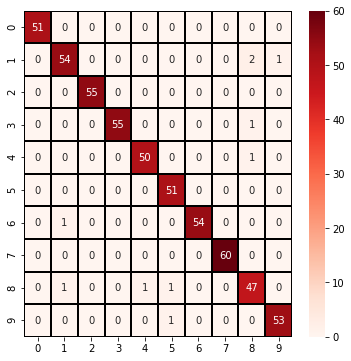

In [95]:
import seaborn as sns
plt.figure(figsize = (6,6))
sns.heatmap(c_m,cmap= "Reds", linecolor = 'black' , linewidth = 1 , annot = True, fmt='')

In [96]:
from sklearn.metrics import confusion_matrix , classification_report

print(classification_report(y_real_labels, y_pred_labels))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        51
           1       0.96      0.95      0.96        57
           2       1.00      1.00      1.00        55
           3       1.00      0.98      0.99        56
           4       0.98      0.98      0.98        51
           5       0.96      1.00      0.98        51
           6       1.00      0.98      0.99        55
           7       1.00      1.00      1.00        60
           8       0.92      0.94      0.93        50
           9       0.98      0.98      0.98        54

    accuracy                           0.98       540
   macro avg       0.98      0.98      0.98       540
weighted avg       0.98      0.98      0.98       540



In [103]:
a=[X.iloc[121]]
a=s.transform(a)
b=model.predict(a)
b

array([[7.98636703e-15, 3.25757845e-12, 5.00689199e-18, 3.18140492e-28,
        1.00000000e+00, 5.90584657e-17, 1.44614809e-16, 7.54728474e-13,
        1.17488904e-17, 1.48209980e-14]], dtype=float32)

In [105]:
y_121=np.argmax(b)
y_121

4

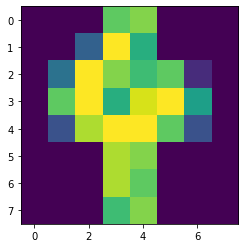

In [102]:
plt.imshow(digits.images[121])